In [1]:
import numpy as np
from neurodsp.sim.cycles import sim_asine_cycle
from tslearn.clustering import TimeSeriesKMeans

### Clustering waveforms

This offers an alternative to resampling cycles prior to clustering cycles into motifs. Instead, dynamic time warping (DTW) + k-means clustering allows for a ragged lengths cycles to be cluster (i.e. varying lengths, padded with trailing np.nans). This approach is much slower and the grid of k-cluster values should be smaller.

A similar approach could also be used for spike soring, but speed may limits it use.

Below is a proof of concept, using varying length asine waves with different rise-decay symmetries. Clustering successfully untangle the shapes, bypassing the random length differences.

In [435]:
n_ts = 1000
max_len = 250
n_ds = 1

X = np.zeros((n_ts, max_len, n_ds))
X[:] = np.nan

lengths = np.arange(100, 251)
rdsyms = [.1, .5, .9]

rdsyms = np.random.choice(rdsyms, size=n_ts)
lengths = np.random.choice(lengths, size=n_ts)

for ts_idx in range(n_ts):
    
    wave = sim_asine_cycle(1, lengths[ts_idx], rdsyms[ts_idx])
    
    X[ts_idx, :len(wave), 0] = wave

In [436]:
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10,
                          max_iter_barycenter=10, verbose=1, n_jobs=-1,
                          random_state=0).fit_predict(X)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.9s finished
[Parall

0.034 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.6s finished


0.032 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.6s finished


0.032 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.6s finished


0.032 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.6s finished


0.032 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.6s finished


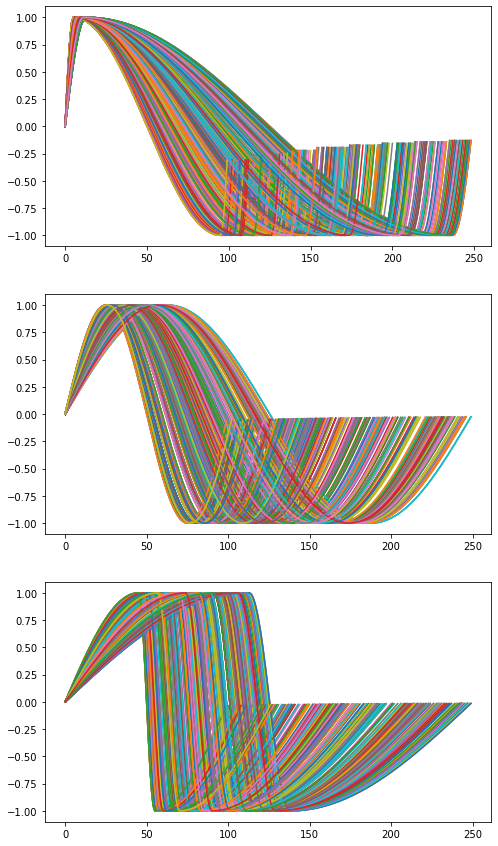

In [443]:
fig, axes = plt.subplots(figsize=(8, 15), nrows=3)

for i in range(3):
    idxs = np.where(km_dba == i)[0]
    
    for j in idxs:
        axes[i].plot(X[j, :, 0])

#plt.savefig('test.jpg')
plt.show()